[View in Colaboratory](https://colab.research.google.com/github/yerimlim/Deeplearning_exercises/blob/master/santander_1.ipynb)

# 데이터 불러들이기

##  [Kaggle api](https://github.com/Kaggle/kaggle-api)를 통해 불러들이자. 

책에 소개된 방법은 python IDE를 이용하는 방법인데, Colaboratory에서 이 방법대로 하면 안 된다. 

[Colaboratory에서 Kaggle API를 사용하는 방법](https://medium.com/@move37timm/using-kaggle-api-for-google-colaboratory-d18645f93648)은 아래 코드를 따라하면 하면 된다. 




### Colaboratory와 Kagge API를 연결하는 코드는 아래와 같다. 
아래 코드를 실행하면 colaboratory에서 Santander  train 데이터를 바로 이용할 수 있다. 

In [1]:
# 패키지 다운로드
!pip install kaggle

# colaboratory 권한으로 kaggle에 접근할 수 있도록 허락
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

#santander 파일을 다운받는다. 
!kaggle competitions download -c santander-product-recommendation #santander 데이터만 다운받는다.

# 데이터를 읽어들인다
import pandas as pd
trn = pd.read_csv('/content/train_ver2.csv.zip', compression='zip', header=0, sep=',')
trn.shape


    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 235kB 5.3MB/s 
  Running setup.py bdist_wheel for kaggle ... - done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
Download 100%.
  0% 0.00/2.28M [00:00<?, ?B/s]
100% 2.28M/2.28M [00:00<00:00, 142MB/s]
 71% 9.00M/12.7M [00:00<00:00, 71.4MB/s]
100% 12.7M/12.7M [00:00<00:00, 91.6MB/s]
 92% 203M/222M [00:02<00:00, 119MB/s]
100% 222M/222M [00:02<00:00, 105MB/s]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(13647309, 48)

### Jupyter에서 Kaggle API를 연결한다

In [ ]:
# 패키지 다운로드
!pip install kaggle

In [ ]:
#santander 파일을 다운받는다. 
!kaggle competitions download -c santander-product-recommendation 
#santander 데이터만 다운받는다.

In [ ]:
# 데이터를 읽어들인다
import pandas as pd
trn = pd.read_csv('./train_ver2.csv.zip', compression='zip', header=0, sep=',')
# trn.shape

### pd.read_csv를 이용해 로컬에서 데이터를 불러오는 방법

In [2]:
import os
cwd = os.getcwd()
print(cwd)

E:\Dropbox\2017\06.job_recruitment\13.Programming\03.ML\DeepLearningZeroToAll-master\Deeplearning_exercises


In [17]:
# 데이터를 읽어들인다
import pandas as pd
trn = pd.read_csv('./train_ver2.csv', low_memory=False)
# trn.shape

ParserError: Error tokenizing data. C error: out of memory

### 데이터가 잘 불러들여졌는지 확인한다




In [ ]:
trn.shape

In [7]:
trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


## 데이터를 살펴본다

#### 변수명을 나열해보자

In [8]:
print(trn.columns)

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')


  #### 각 변수가 어떻게 이루어져있는지 개괄적으로 살펴보자

In [9]:
for col in trn.columns:
  print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

#### trian 변수들이 어떤 형태를 띠는지 info함수를 통해 살펴본다

---



In [0]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

#### 고객 데이터중 object인 것들만 추출해서 살펴본다. 

In [16]:
pcat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()


,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


#### object인 변수들은 몇개의 unique한 값들로 이루어져있을까? 
결측값은 무엇으로 표시되어있을까?
이상치는 없을까?
한번 살펴보자

In [22]:
import numpy as np

for col in cat_cols:
  uniq = np.unique(trn[col].astype(str))
  print('-'*50)
  print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

## 이제 데이터를 시각화해보자

### barplot으로 변수의 분포 알아보기

In [0]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

--------------------------------------------------
col:  fecha_dato


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


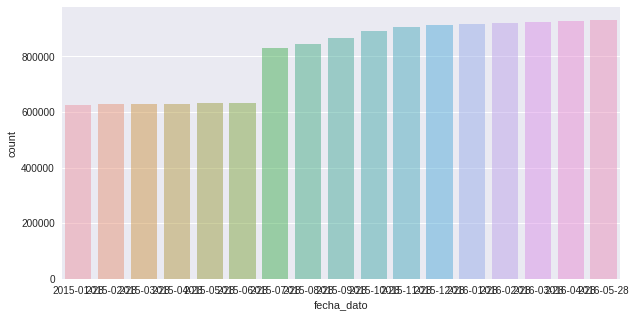

--------------------------------------------------
col:  ind_empleado


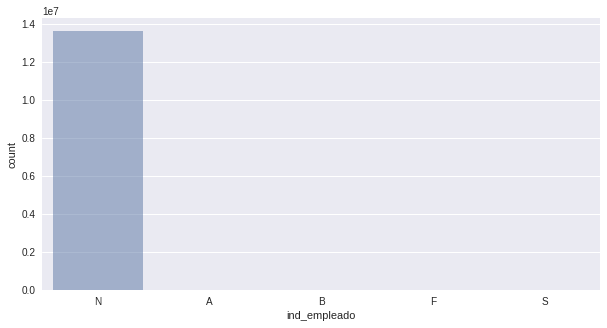

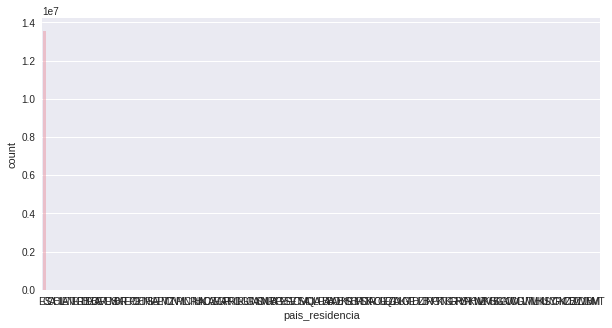

--------------------------------------------------
col:  sexo


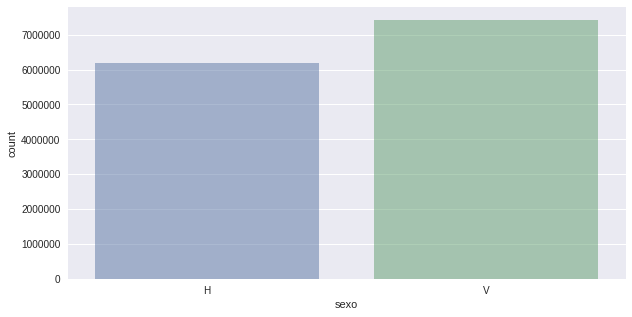

--------------------------------------------------
col:  age


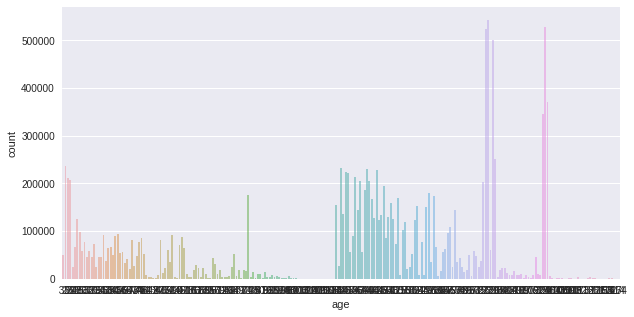

--------------------------------------------------
col:  fecha_alta


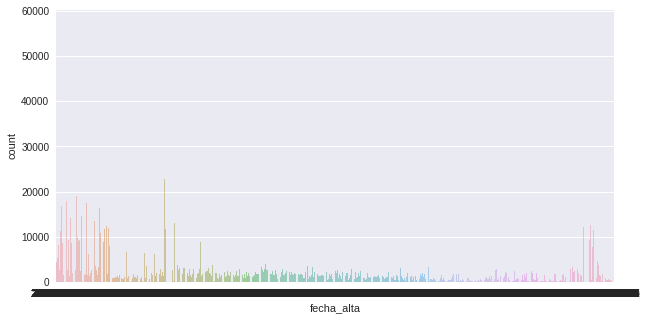

--------------------------------------------------
col:  ind_nuevo


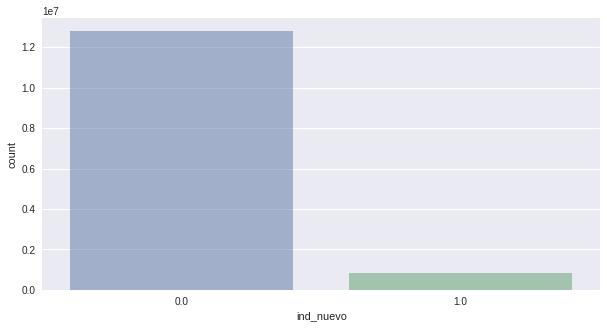

--------------------------------------------------
col:  antiguedad


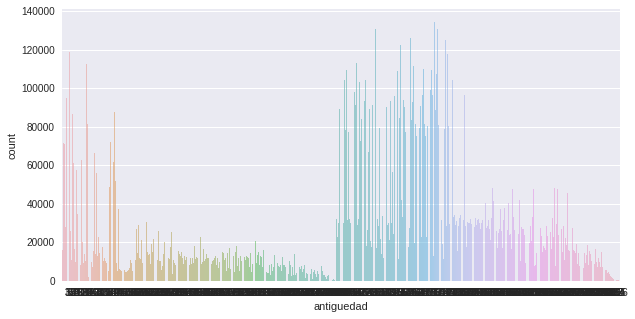

--------------------------------------------------
col:  indrel


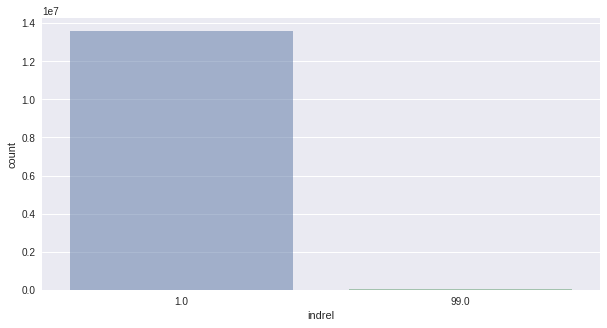

--------------------------------------------------
col:  ult_fec_cli_1t


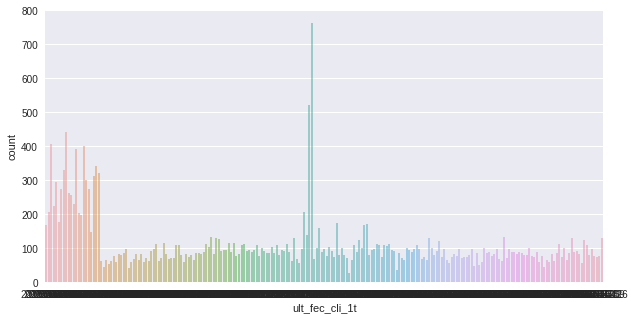

--------------------------------------------------
col:  indrel_1mes


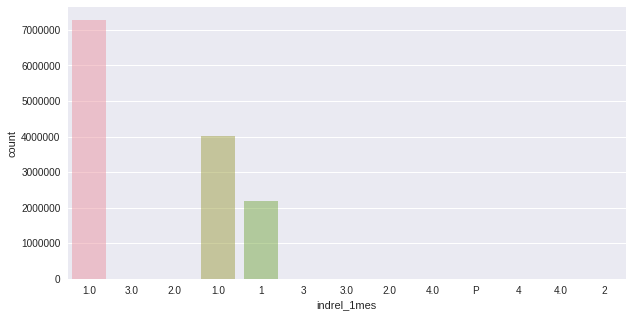

--------------------------------------------------
col:  tiprel_1mes


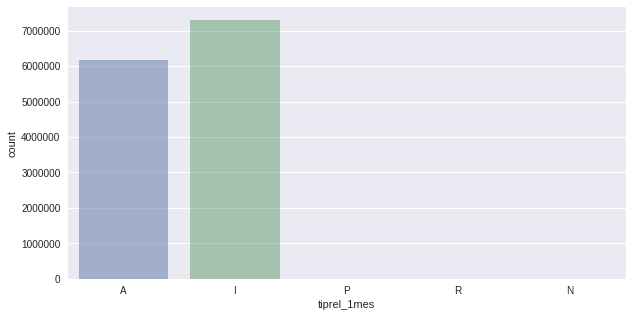

--------------------------------------------------
col:  indresi


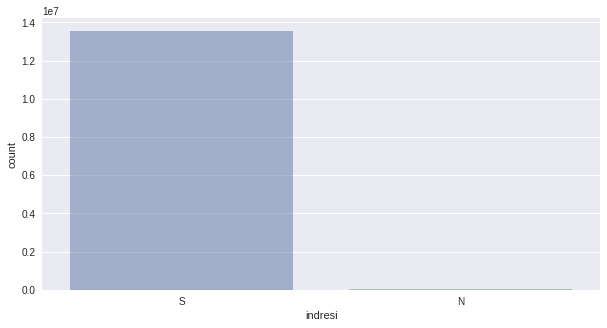

--------------------------------------------------
col:  indext


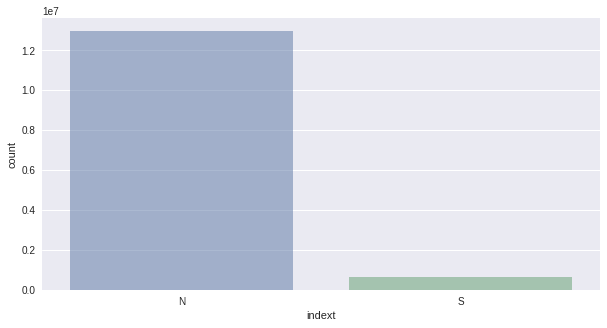

--------------------------------------------------
col:  conyuemp


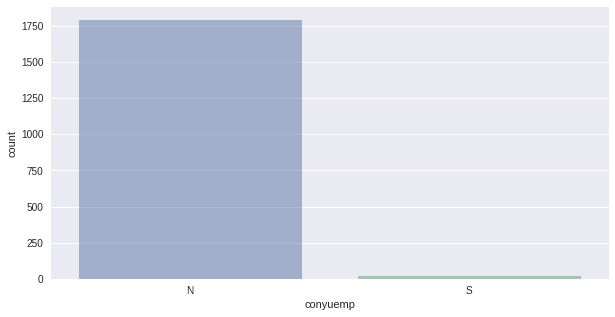

--------------------------------------------------
col:  canal_entrada


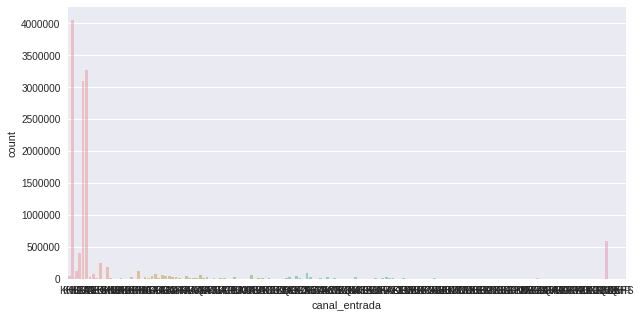

--------------------------------------------------
col:  indfall


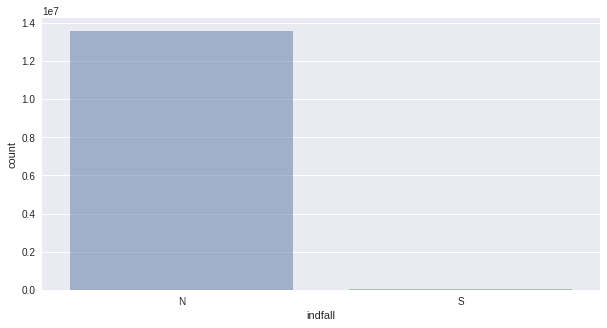

--------------------------------------------------
col:  tipodom


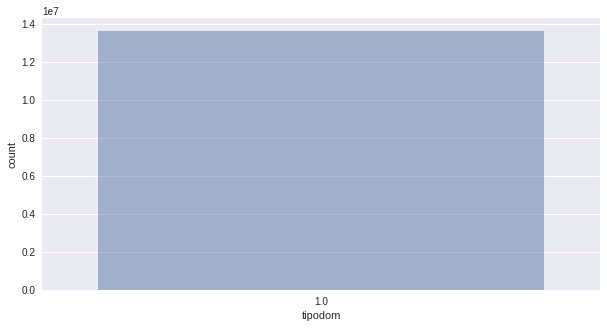

--------------------------------------------------
col:  cod_prov


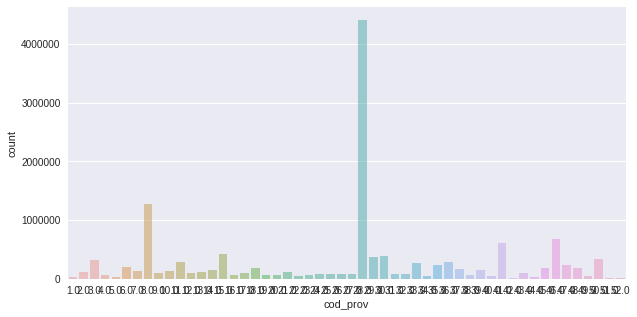

--------------------------------------------------
col:  nomprov


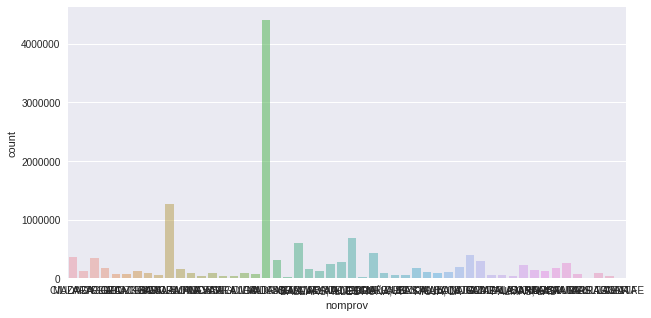

--------------------------------------------------
col:  ind_actividad_cliente


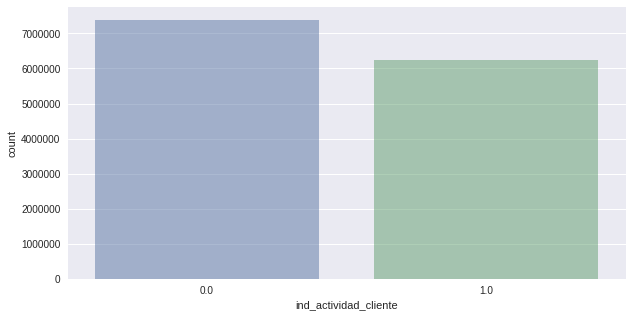

--------------------------------------------------
col:  segmento


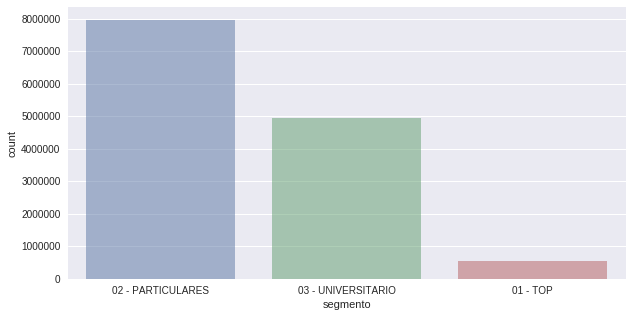

--------------------------------------------------
col:  ind_ahor_fin_ult1


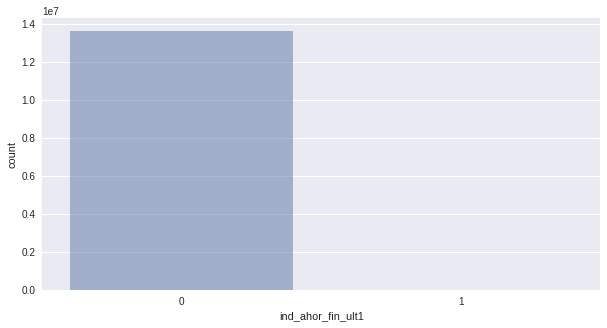

--------------------------------------------------
col:  ind_aval_fin_ult1


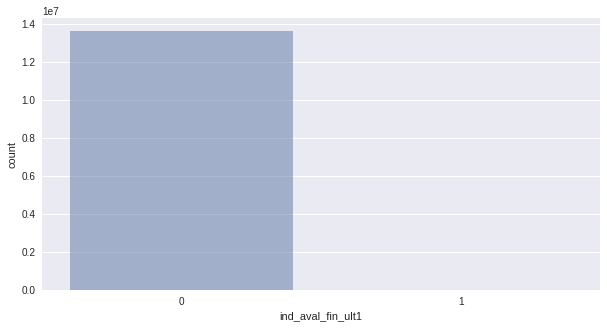

--------------------------------------------------
col:  ind_cco_fin_ult1


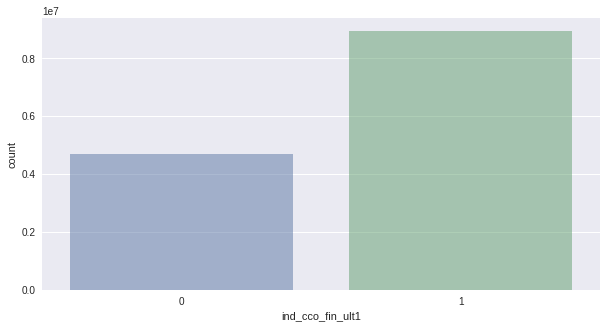

--------------------------------------------------
col:  ind_cder_fin_ult1


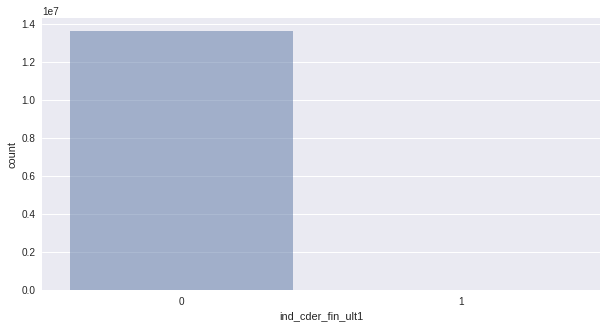

--------------------------------------------------
col:  ind_cno_fin_ult1


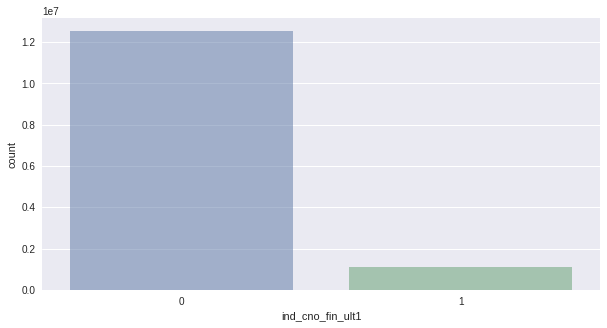

--------------------------------------------------
col:  ind_ctju_fin_ult1


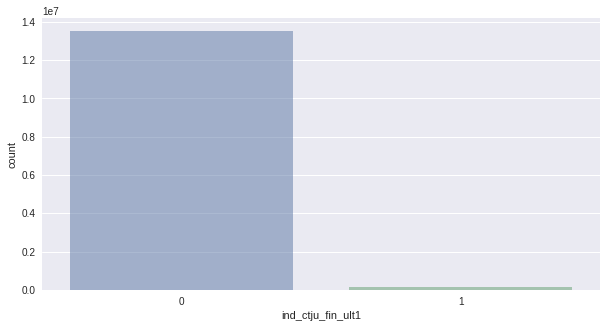

--------------------------------------------------
col:  ind_ctma_fin_ult1


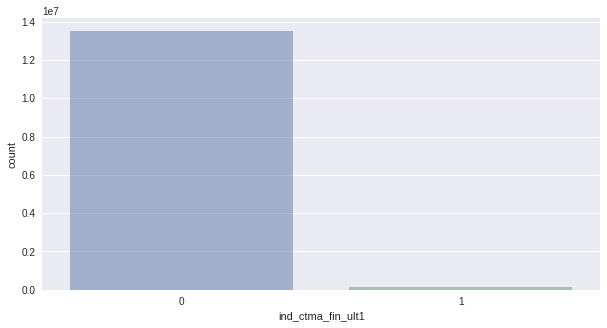

--------------------------------------------------
col:  ind_ctop_fin_ult1


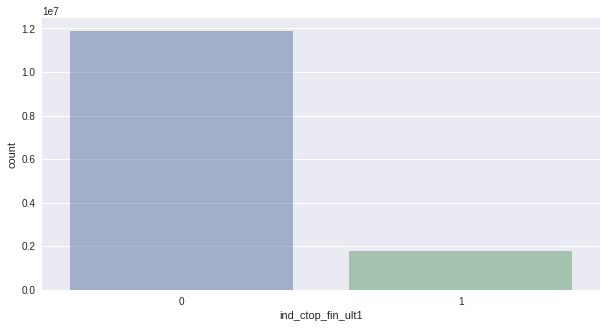

--------------------------------------------------
col:  ind_ctpp_fin_ult1


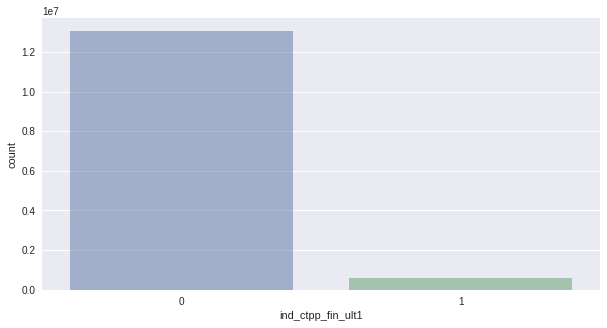

--------------------------------------------------
col:  ind_deco_fin_ult1


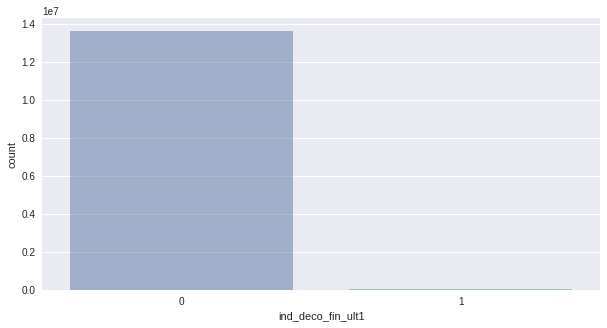

--------------------------------------------------
col:  ind_deme_fin_ult1


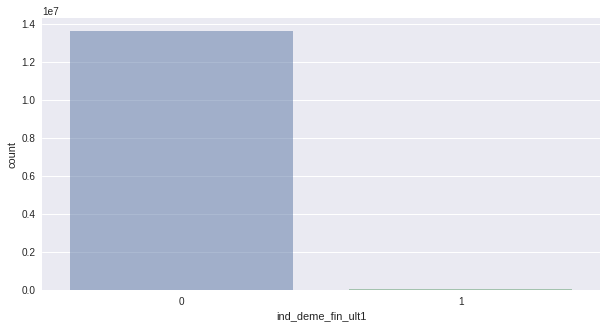

--------------------------------------------------
col:  ind_dela_fin_ult1


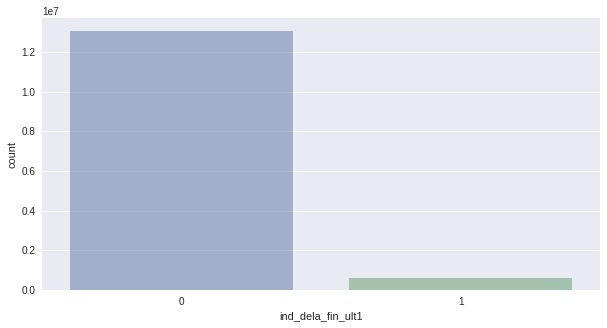

--------------------------------------------------
col:  ind_ecue_fin_ult1


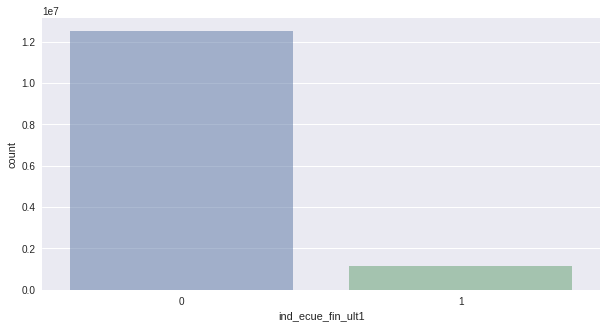

--------------------------------------------------
col:  ind_fond_fin_ult1


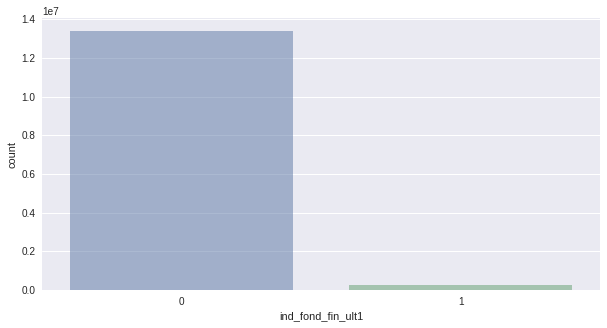

--------------------------------------------------
col:  ind_hip_fin_ult1


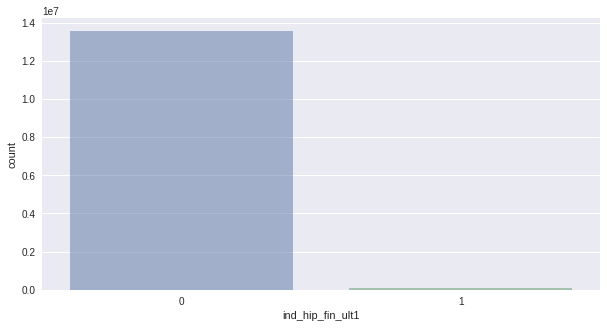

--------------------------------------------------
col:  ind_plan_fin_ult1


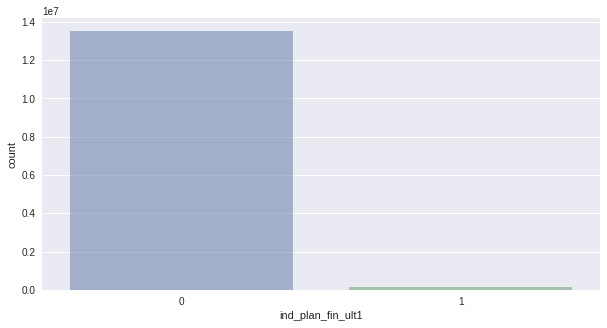

--------------------------------------------------
col:  ind_pres_fin_ult1


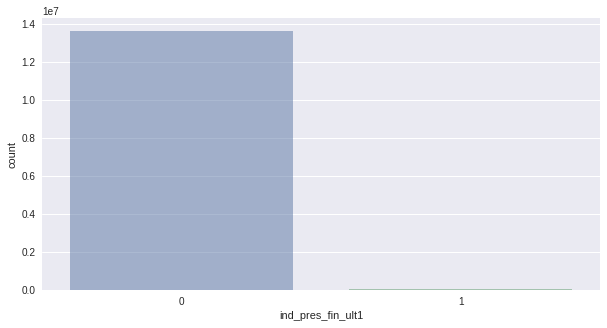

--------------------------------------------------
col:  ind_reca_fin_ult1


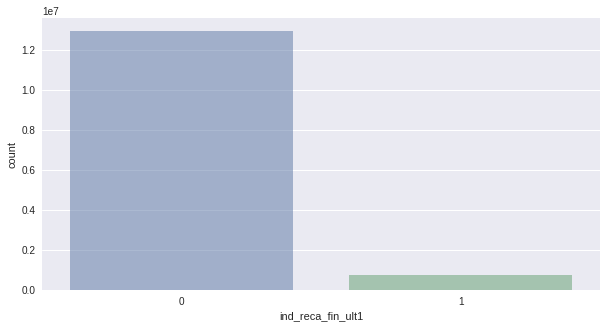

--------------------------------------------------
col:  ind_tjcr_fin_ult1


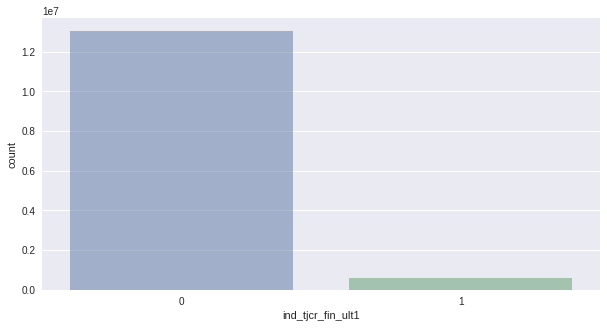

--------------------------------------------------
col:  ind_valo_fin_ult1


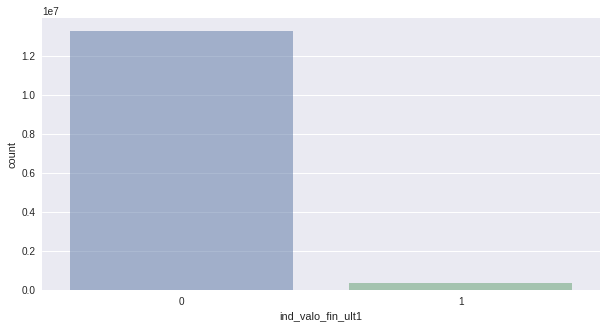

--------------------------------------------------
col:  ind_viv_fin_ult1


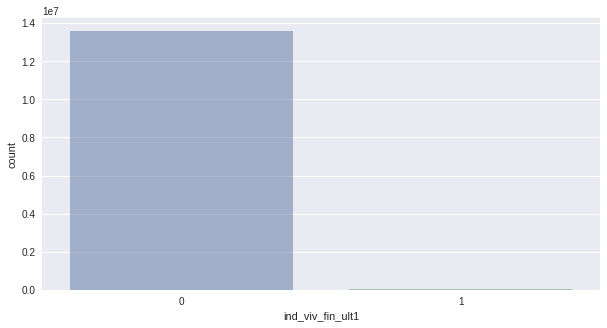

--------------------------------------------------
col:  ind_nomina_ult1


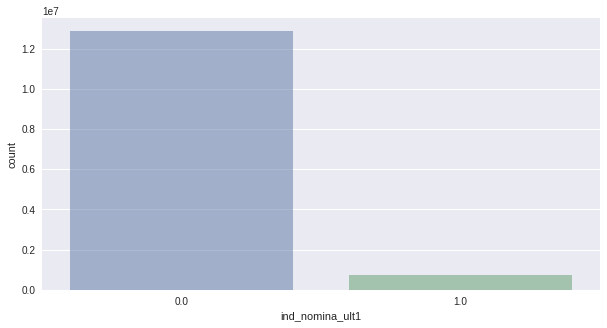

--------------------------------------------------
col:  ind_nom_pens_ult1


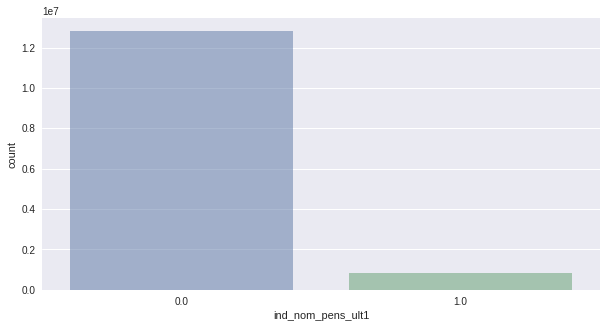

--------------------------------------------------
col:  ind_recibo_ult1


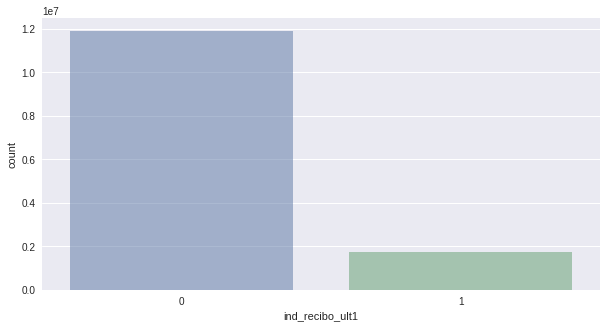

In [29]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
  if col in skip_cols:
    continue
    
  print('-' * 50)
  print('col: ', col)
  
  f,ax = plt.subplots(figsize = (10,5))
  sns.countplot(x = col, data = trn, alpha = 0.5)
  plt.show()
  

### 시계열 그래프를 그려보자

 날짜(fecha_dato)에 따라 금융상품 가입자의 수가 어떻게 달라지는지 알아보자. 
 
 
 먼저, 데이터를 날짜별로 groupby 한 후 각 금융상품 별 합계(sum)을 구해보자

In [0]:
months = trn['fecha_dato'].unique().tolist()

label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
  label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
  label_over_time.append(label_sum.tolist())
  
 

위에서는 금융상품 가입자수가 시간에 따라 변하는 것을 살펴보았다. 

아래에서는 금융상품 가입자수의 총합을 살펴보려한다. 

In [0]:
label_sum_over_time = []
for i in range (len(label_cols)):
  label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))


In [0]:
color_list = ['#f5b7b1', "#d2b4de", '#a3d6f1', '#a2d9ce', '#abebc6', '#f9e79f', '#f5cba7','#ccd1d1']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


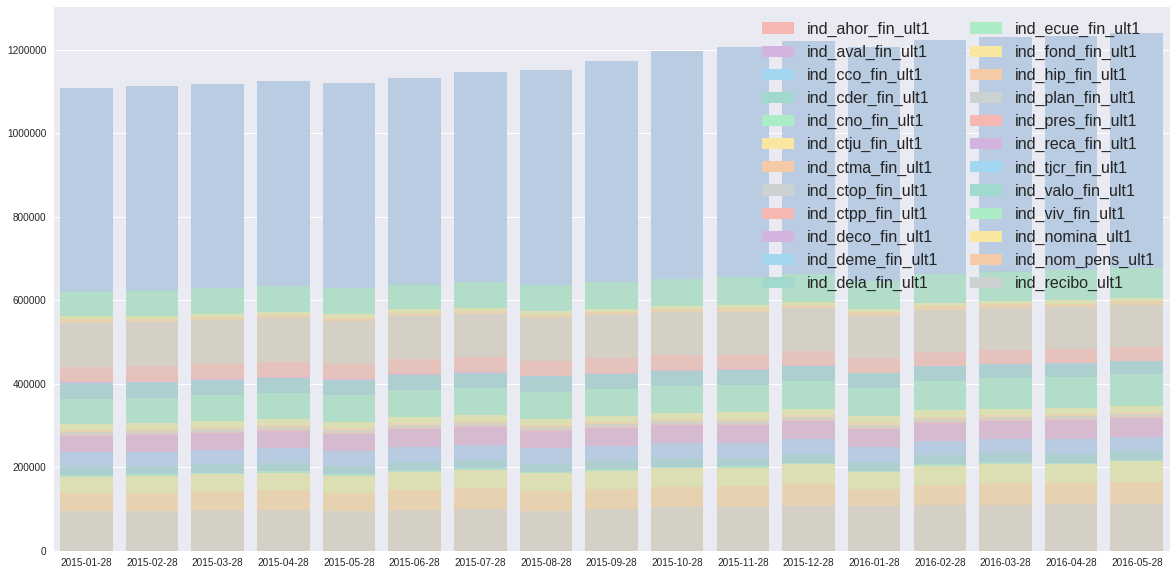

In [37]:
f, ax = plt.subplots(figsize = (20,10))

for i in range(len(label_cols)):
  sns.barplot(x = months, y = label_sum_over_time[i], color= color_list[i%8], 
             alpha=0.7)
  
  plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none')
             for i in range(len(label_cols))],
            label_cols, loc=1, ncol=2, prop={'size':16})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


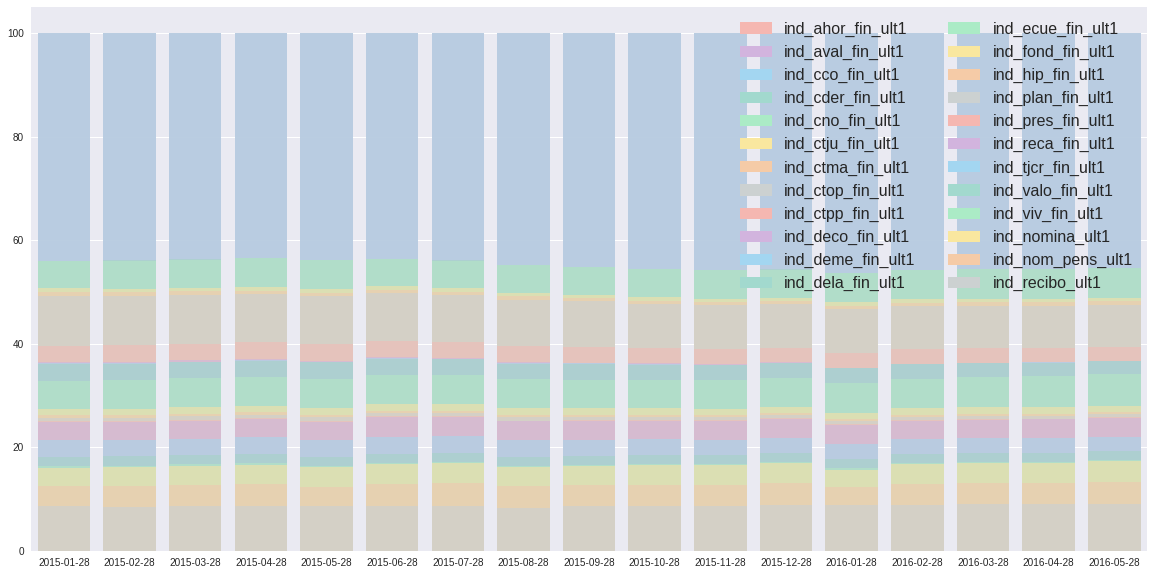

In [40]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)))*100

f, ax = plt.subplots(figsize = (20,10))
for i in range(len(label_cols)):
  sns.barplot(x= months , y = label_sum_percent[i],
             color=color_list[i%8], alpha=0.7)

plt.legend([plt.Rectangle((0,0),1,1, fc = color_list[i%8],
           edgecolor= 'none')
           for i in range(len(label_cols))],
          label_cols, loc=1, ncol=2, prop = {'size':16}) 


In [53]:
print(label_cols)

['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


## 24개 금융상품에 대해 신규구매 데이터를 생성하자



### 날짜를 integer변수로 변환한다

In [0]:
import pandas as pd
import numpy as np

prods = trn.columns[24:].tolist()


def date_to_int(str_date):
  Y, M, D = [int(a) for a in str_date.strip().split("-")]
  int_date = ( int(Y) - 2015)*12 + int(M)
  return int_date


In [0]:
# date_to_int("2015-04-01")

trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)
# integer_date = date_to_int(trn['fecha_dato'])
# trn['int_date'] =integer_date.astype(np.int8) 

In [7]:
trn['int_date'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [0]:
trn_lag = trn.copy()

In [11]:
trn_lag['int_date'] +=1
trn_lag['int_date'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [0]:
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

In [0]:
# trn.df = pd.DataFrame.from_items(trn)
# trn_lag.df = pd.DataFrame.form_items(trn_lag)

In [0]:
df_trn = trn.merge(trn_lag, on = ['ncodpers', 'int_date'],  how = 'left')

In [0]:
del trn, trn_lag